# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- **Nama:** Salma Zhahira
- **Email:** salmazhahira26@gmail.com
- **ID Dicoding:** salmajeir

## Menentukan Pertanyaan Bisnis

- Which cities need to be focused on expanding the seller network?
- What type of payment do customers often use when shopping at Olist E-Commerce?


## Import Semua Packages/Library yang Digunakan

The first step that must be taken is to import all the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Data wrangling is carried out to ensure that the data is ready for use. In this section there are gathering data, assessing, and cleaning data.

### Gathering Data

The data used is original from: https://drive.google.com/file/d/1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK/view

Upload data and call it with read_csv. The datasets that will be used for this analysis are the sellers dataset and order payments dataset.

In [14]:
from google.colab import files
import io

uploaded = files.upload()

Saving sellers_dataset.csv to sellers_dataset.csv


In [15]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "sellers_dataset.csv" with length 174703 bytes


Payments Tabel

In [4]:
payments_df = pd.read_csv(io.StringIO(uploaded['order_payments_dataset.csv'].decode('utf-8')))
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Sellers Tabel

In [16]:
sellers_df = pd.read_csv(io.StringIO(uploaded['sellers_dataset.csv'].decode('utf-8')))
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Reviews Tabel

In [12]:
reviews_df = pd.read_csv(io.StringIO(uploaded['order_reviews_dataset.csv'].decode('utf-8')))
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Assessing Data

Enter the assessing data, at this section the data will be checked starting from the data type for each variable, missing value, until duplicate data.

#### Menilai tabel `payments_df`

In [83]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
 5   category_value        103886 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ MB


In [84]:
payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
category_value          0
dtype: int64

In [85]:
payments_df.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
category_value              2
dtype: int64

In [86]:
print("Jumlah duplikasi: ", payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [87]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


After running, there are no errors in the data.

#### Menilai tabel `sellers_df`

In [88]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [89]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [90]:
sellers_df.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

In [91]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


After running, there are no errors in the data.

#### Menilai tabel `reviews_df`

In [92]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [93]:
reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [94]:
reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [95]:
print("Jumlah duplikasi: ", reviews_df.duplicated().sum())

Jumlah duplikasi:  0


After running, there was an error in the data type and missing values.

### Cleaning Data

#### Membersihkan tabel `payments_df`

##### Memperbaiki tipe data

In [96]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
 5   category_value        103886 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ MB


##### Duplicate data

In [97]:
payments_df.duplicated().sum()

0

##### Missing values

In [98]:
payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
category_value          0
dtype: int64

##### Innacurate value

In [99]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In the payments dataset, the output is obtained that the data type for each variable is appropriate. Then, there are no duplicate data, missing values, and also innacurate values. So, it can be proceed to the next section.

#### Membersihkan tabel `sellers_df`

##### Memperbaiki tipe data

In [100]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


##### Duplicate data

In [101]:
sellers_df.duplicated().sum()

0

##### Missing values

In [102]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In the sellers dataset, the output is obtained that the data type for each variable is appropriate. Then, there are no duplicate data, missing values, and also innacurate values. So, it can be proceed to the next section.

#### Membersihkan tabel `reviews_df`

##### Memperbaiki tipe data

In [103]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [104]:
datetime_columns = ["review_creation_date"]
for column in datetime_columns:
  reviews_df[column] = pd.to_datetime(reviews_df[column])

In [105]:
datetime_columns = ["review_answer_timestamp"]
for column in datetime_columns:
  reviews_df[column] = pd.to_datetime(reviews_df[column])

In [106]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


There is an error in the review creation date and review answer timestamp data types, it can be seen that before cleaning it was still in object form. when finished, the data type is correct to datetime.

##### Memperbaiki missing values

In [107]:
reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [108]:
reviews_df[reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [46]:
reviews_df[reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42


In [109]:
reviews_df.review_comment_title.value_counts()

Recomendo                    88079
recomendo                      345
Bom                            293
super recomendo                270
Excelente                      248
                             ...  
Luminaria sobrepor led 18        1
Não recebi.                      1
produto com lacre violado        1
Atraso Entrega                   1
Foto enganosa                    1
Name: review_comment_title, Length: 4527, dtype: int64

In [110]:
reviews_df.review_comment_message.value_counts()

Muito bom                                                                                                                                                                                              58477
Bom                                                                                                                                                                                                      189
muito bom                                                                                                                                                                                                122
bom                                                                                                                                                                                                      107
Recomendo                                                                                                                                                                           

In [111]:
reviews_df['review_comment_title'].fillna(value="Recomendo", inplace=True)

In [112]:
reviews_df['review_comment_message'].fillna(value="Muito bom", inplace=True)

In [113]:
reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

There are missing values in the data, so an imputation method must be used to correct them. After cleaning, it can be seen that the data is free from missing values.

#### Menggabungkan data `payments_df` dan `reviews_df`

In [52]:
payments_reviews_df = pd.merge(
    left=payments_df,
    right=reviews_df,
    how="outer",
    left_on="order_id",
    right_on="order_id"
)
payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1.0,credit_card,8.0,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1.0,credit_card,1.0,24.39,ad2036caca61484fc435d7e673c020f2,5.0,Recomendo,Muito bom,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1.0,credit_card,1.0,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Recomendo,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1.0,credit_card,8.0,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,Recomendo,Muito bom,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1.0,credit_card,8.0,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,Recomendo,Muito bom,2017-12-21,2017-12-22 01:10:39


#### Menggabungkan data `payments_df`, `reviews_df`, dan `sellers_df`

In [53]:
all_df = pd.merge(
    left=payments_reviews_df,
    right=sellers_df,
    how="left",
    left_index=True,
    right_index=True
)
all_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,b81ef226f3fe1789b1e8b2acac839d17,1.0,credit_card,8.0,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00,3442f8959a84dea7ee197c632cb2df15,13023.0,campinas,SP
1,a9810da82917af2d9aefd1278f1dcfa0,1.0,credit_card,1.0,24.39,ad2036caca61484fc435d7e673c020f2,5.0,Recomendo,Muito bom,2018-06-30,2018-07-03 11:23:16,d1b65fc7debc3361ea86b5f14c68d2e2,13844.0,mogi guacu,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1.0,credit_card,1.0,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Recomendo,Aprovada,2017-12-19,2017-12-22 17:55:30,ce3ad9de960102d0677a81f5d0bb7b2d,20031.0,rio de janeiro,RJ
3,ba78997921bbcdc1373bb41e913ab953,1.0,credit_card,8.0,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,Recomendo,Muito bom,2017-12-21,2017-12-21 21:42:31,c0f3eea2e14555b6faeea3dd58c1b1c3,4195.0,sao paulo,SP
4,ba78997921bbcdc1373bb41e913ab953,1.0,credit_card,8.0,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,Recomendo,Muito bom,2017-12-21,2017-12-22 01:10:39,51a04a8a6bdcb23deccc82b0b80742cf,12914.0,braganca paulista,SP


## Exploratory Data Analysis (EDA)

As the name suggests, at this section data exploration will be carried out to find out a general overview of the data and a description of data. EDA will be carried out on payments dataset and sellers dataset.

### Explore `payments_df`

Random samples will be selected from the payments dataset and produce the following output:

In [114]:
payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,category_value
52817,a0ed4ee4837f4807030d5ebbe2ea16e2,1,credit_card,1,65.00,less than 154.1
11073,b2415aa888da881becd698f59da124b8,1,credit_card,1,133.21,less than 154.1
99667,b544e719948795192f13772cc29b6316,1,credit_card,1,38.84,less than 154.1
101807,701ed63cdee1bf7a8aeb7f690acb04a2,1,credit_card,10,134.88,less than 154.1
29040,fcf77320278b491829c6e5d767a3f20d,1,credit_card,2,312.61,greater than equal 154.1


By using the describe function, output will appear starting from count, unique, until max values for each variable as shown below:

In [73]:
payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In this part, the payment type variable can be sorted based on the most users.

In [ ]:
payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

Payment values contained in the data will be divided into two categories, namely payment values that greater equals than the average (>=154.1) and less than the average (<154.1).

In [74]:
payments_df["category_value"] = np.where(
    payments_df['payment_value'] >= 154.1, "greater than equal 154.1", "less than 154.1")

payments_df[['payment_value', 'category_value']]

,payment_value,category_value
0,99.33,less than 154.1
1,24.39,less than 154.1
2,65.71,less than 154.1
3,107.78,less than 154.1
4,128.45,less than 154.1
...,...,...
103881,363.31,greater than equal 154.1
103882,96.80,less than 154.1
103883,47.77,less than 154.1
103884,369.54,greater than equal 154.1


It was found that the payment values category was more than the same as the average of 68953 and the rest were in the payment values category which was less than the average.

In [75]:
payment_value_df = payments_df.groupby(by="category_value").order_id.nunique().sort_values(ascending=False)
payment_value_df

category_value
less than 154.1             68953
greater than equal 154.1    30884
Name: order_id, dtype: int64

### Explore `sellers_df`

Random samples will be selected from the sellers dataset and produce the following output:

In [76]:
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1701,a3f0b55de503387383c7b1de3ad7f678,82400,curitiba,PR
1640,013900e863eace745d3ec7614cab5b1a,80740,curitiba,PR
221,0a82f5fb06a4fe4ac2cf7cb412ec71b8,5524,sao paulo,SP
813,ae8bfdbf1c2a2a2dee92d799db0a31c6,85900,toledo,PR
981,f5f1f2c5f923f36ad79ea1d07185ddc9,19820,taruma,SP


By using the describe function, output will appear starting from count, unique, until max values for each variable as shown below:

In [ ]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In this part, data will be sorted by the city.

In [77]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In this part, data will be sorted by the state.

In [78]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

### Explore `reviews_df`

Random samples will be selected from the sellers dataset and produce the following output:

In [115]:
reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3557,ba432540134a1a91aea245d2add57b26,726578ea1b027b33080a7a807e97941a,5,Recomendo,"Chegou bem antes do prazo, super bem embalado,...",2018-02-16,2018-02-16 21:23:27
46847,bcc1a766a3eeb36d5053acf45e14d7ea,36307ab4d5c4b59fbc4034d2adb2cb77,5,Recomendo,Muito bom,2018-05-16,2018-05-18 19:42:37
11164,9c21503946ec61ecae24e6bc456f8eff,7e54f2e2af1f04c407423998a9812c73,5,Recomendo,"Muito bom, e por ser dupla face é muito versátil",2018-03-05,2018-03-05 17:59:54
3934,960a96bec9dadd6598cf375ea30cbe87,a37a7ca4bfc323dd5c2466e609e4ae61,5,Recomendo,Muito bom,2018-06-16,2018-06-19 13:19:14
98200,88799c9ece425f5f40f02678520071d3,03f83b59e7c7355647462745b18119f1,3,Recomendo,"O produto em si é bom, mas a entrega deixou mu...",2017-08-08,2017-08-11 02:21:20


By using the describe function, output will appear starting from count, unique, until max values for each variable as shown below:

In [116]:
reviews_df.describe(include="all")

<ipython-input-116-b32f5e178f2e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  reviews_df.describe(include="all")
<ipython-input-116-b32f5e178f2e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  reviews_df.describe(include="all")


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,88079,58477,463,4
first,NaN,NaN,NaN,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
last,NaN,NaN,NaN,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN


In this part, data will be sorted by the review score.

In [81]:
reviews_df.groupby(by="review_score").order_id.nunique().sort_values(ascending=False)

review_score
5    57076
4    19098
1    11393
3     8160
2     3148
Name: order_id, dtype: int64

In this part we will try to make a diagram to see the number of customers for each score given by Olist E-Commerce. It was found that many customers gave a score of 5 which shows that they are satisfied.

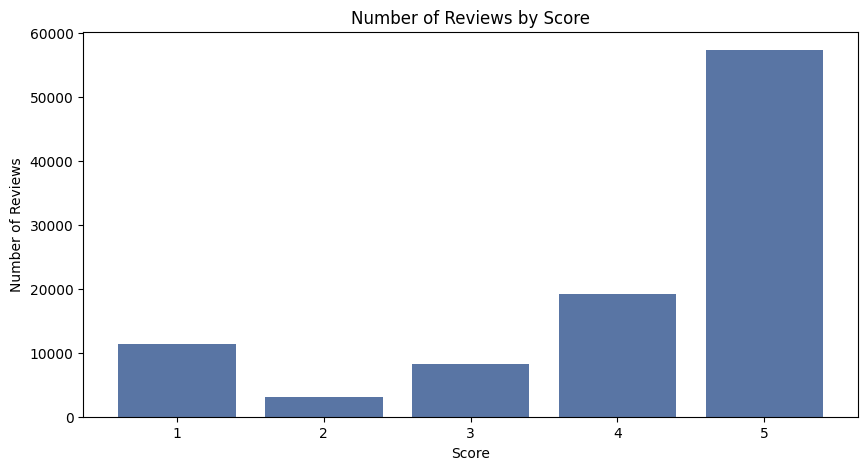

In [82]:
review_counts = reviews_df['review_score'].value_counts().sort_index()
review_scores = review_counts.index

# Membuat bar chart
plt.figure(figsize=(10, 5))
plt.bar(review_scores, review_counts, color='#5975a4')

# Menambahkan label dan judul
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Score')

# Menampilkan plot
plt.show()

## Visualization & Explanatory Analysis

### Question 1: Which cities need to be focused on expanding the seller network?

In [58]:
city_df = sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).reset_index()
city_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)
city_df

,seller_city,seller_count
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
...,...,...
606,ivoti,1
607,itirapina,1
608,itau de minas,1
609,itapui,1


In [59]:
import seaborn as sns

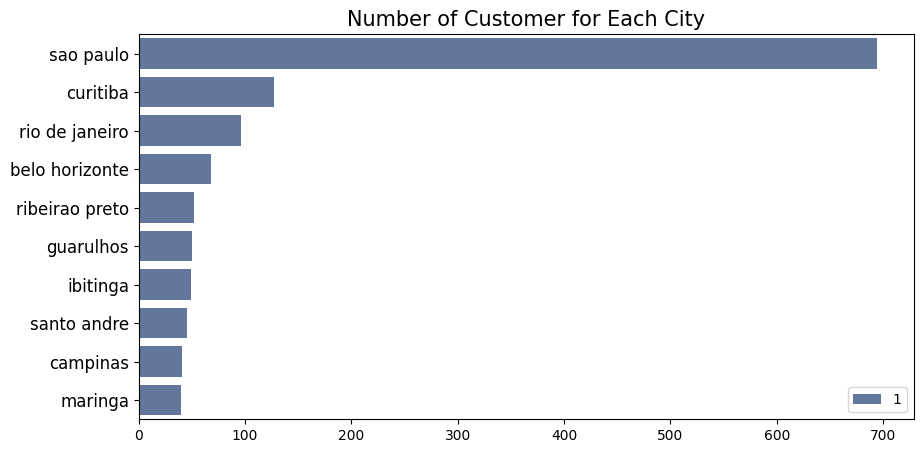

In [118]:
plt.figure(figsize=(10, 5))
colors_ = ["#5975a4"]

sns.barplot(
    x="seller_count",
    y="seller_city",
    hue=1,
    data=city_df.sort_values(by="seller_count", ascending=False).head(10),
    palette=colors_
)
plt.title("Number of Customer for Each City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Question 2: What type of payment do customers often use when shopping at Olist E-Commerce?

In [61]:
bytype_df = payments_df.groupby(by="payment_type").order_id.nunique().reset_index()
bytype_df

,payment_type,order_id
0,boleto,19784
1,credit_card,76505
2,debit_card,1528
3,not_defined,3
4,voucher,3866


In [67]:
import seaborn as sns

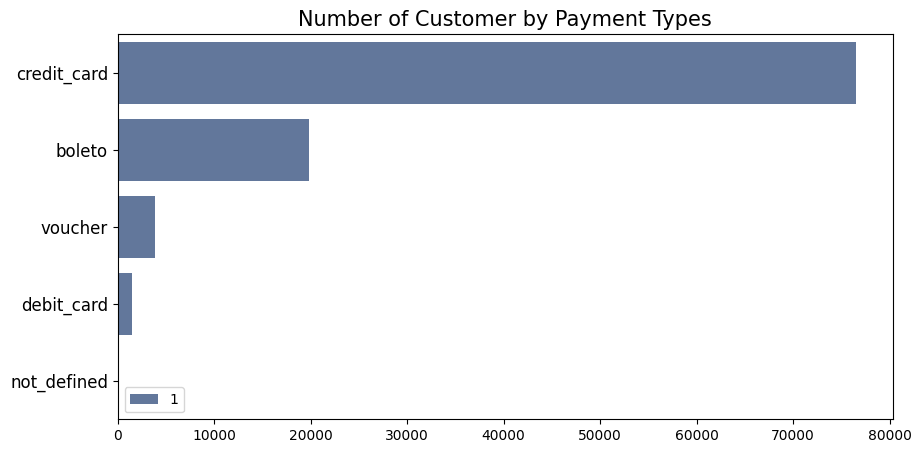

In [119]:
plt.figure(figsize=(10, 5))
colors_ = ["#5975a4"]
sns.barplot(
    x="order_id",
    y="payment_type",
    hue=1,
    data=bytype_df.sort_values(by="order_id", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by Payment Types", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- Question 1: From the bar plot presented, the city need to be focused on expanding the seller network is Sao Paulo because by optimizing the number of sellers in that city it can increase customer satisfaction. Then, it can be used as a strategy marketing of Olist E-Commerce to sell their products. This is done with the aim of supporting business growth
- Question 2: From the bar plot, it can be concluded that the type of payment that customers often use when shopping at Olist E-Commerce is by credit card. Then followed by the boleto, voucher, and debit card payment methods. Olist E-Commerce can create various promos and enticing offers using credit card to attract customers to buy their products.

In [ ]:
all_df.to_csv("all_data.csv", index=False)